# Dimensionality Reduction Techniques Notebook


# Section 1: Introduction to Dimensionality Reduction
Dimensionality reduction is the process of reducing the number of input variables or features in a dataset while preserving its essential structure and information.

# Why is Dimensionality Reduction Important?
1. Simplifies data visualization.
2. Reduces computational costs.
3. Mitigates the curse of dimensionality.
4. Improves model performance by removing irrelevant or redundant features.

# Key Techniques
1. Principal Component Analysis (PCA).
2. Multidimensional Scaling (MDS).
3. Locally Linear Embedding (LLE).
4. Isomap.
5. t-SNE.


In [1]:
# Load Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS, LocallyLinearEmbedding, Isomap
from sklearn.datasets import load_iris, fetch_openml, make_swiss_roll

## Principal Component Analysis (PCA)
PCA reduces the dimensionality of data by projecting it onto a set of orthogonal components that maximize variance.


In [2]:
# Step-by-Step Example with the Iris Dataset
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data
y = data.target

In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

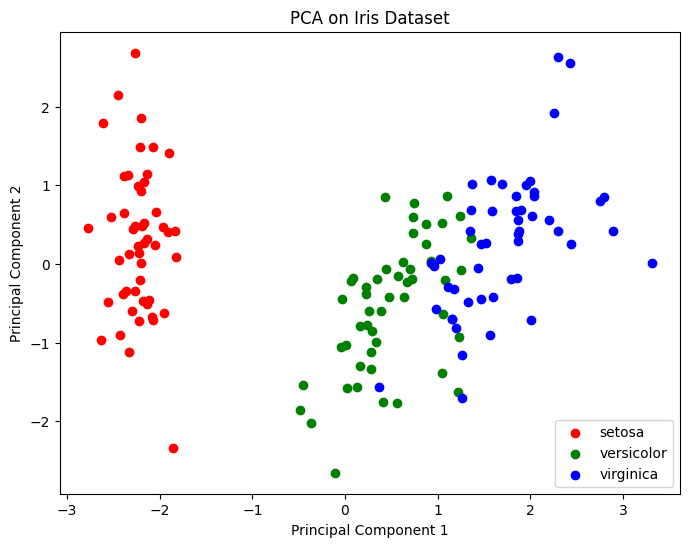

In [5]:
# Visualize the results
plt.figure(figsize=(8, 6))
for target, color in zip(np.unique(y), ['r', 'g', 'b']):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], label=data.target_names[target], color=color)
plt.title("PCA on Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

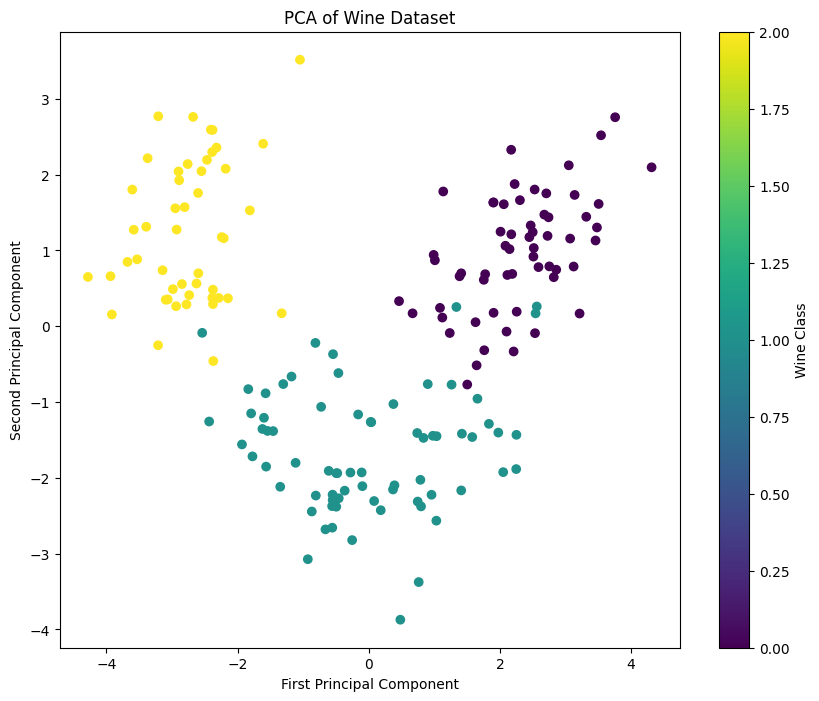

Explained variance ratio: [0.36198848 0.1920749 ]


In [6]:
# Exercise 1: PCA Implementation
"""
Task:
1. Choose a different dataset (e.g., Wine dataset from sklearn).
2. Perform PCA to reduce the dataset to 2 dimensions.
3. Visualize the results with a scatter plot.

Hint:
Use `load_wine()` from sklearn.datasets.
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Wine Dataset')
plt.colorbar(scatter, label='Wine Class')
plt.show()

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

## t-SNE
t-SNE is a non-linear dimensionality reduction method used primarily for visualization of high-dimensional data.


In [7]:
# Example with MNIST Dataset
from sklearn.datasets import fetch_openml

# Load a subset of MNIST dataset
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target

In [ ]:
# Apply t-SNE
# this takes a lot of time
tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca', max_iter=250)
X_tsne = tsne.fit_transform(X)

In [ ]:
# Visualize the results
plt.figure(figsize=(8, 6))
for digit in np.unique(y):
    plt.scatter(X_tsne[y == digit, 0], X_tsne[y == digit, 1], label=digit)
plt.title("t-SNE Visualization of MNIST")
plt.legend()
plt.show()

<ipython-input-9-be3f5edd03ab>:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


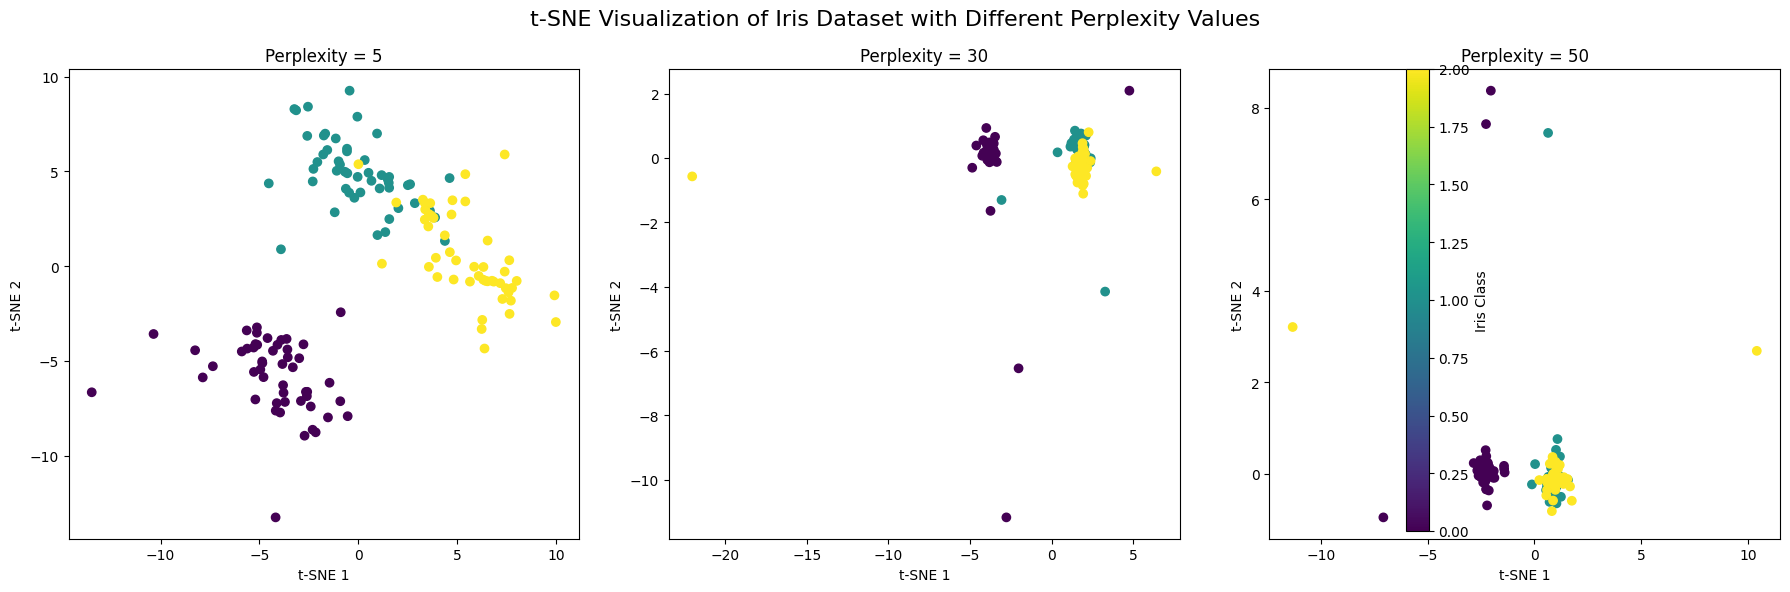

Iris Class Names:
0: setosa
1: versicolor
2: virginica


In [9]:
# Exercise 2: t-SNE Visualization
"""
Task:
1. Use t-SNE on a different dataset (e.g., Iris dataset).
2. Visualize the clusters and interpret the results.

Hint:
Use the Iris dataset and try different values for `perplexity` (e.g., 5, 30, 50).
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define perplexity values to try
perplexities = [5, 30, 50]

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('t-SNE Visualization of Iris Dataset with Different Perplexity Values', fontsize=16)

# Perform t-SNE for each perplexity value
for i, perplexity in enumerate(perplexities):
    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, max_iter=250)
    X_tsne = tsne.fit_transform(X)

    # Plot the results
    scatter = axs[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    axs[i].set_title(f'Perplexity = {perplexity}')
    axs[i].set_xlabel('t-SNE 1')
    axs[i].set_ylabel('t-SNE 2')

# Add a color bar
plt.colorbar(scatter, ax=axs, label='Iris Class')

plt.tight_layout()
plt.show()

# Print the iris class names for reference
print("Iris Class Names:")
for i, name in enumerate(iris.target_names):
    print(f"{i}: {name}")

## Isomap
Isomap is a non-linear dimensionality reduction technique that uses geodesic distances to preserve the global structure of the data.


In [10]:
# Example with Swiss Roll Dataset
X_swiss, _ = make_swiss_roll(n_samples=1000, noise=0.05)

In [11]:
# Apply Isomap
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_swiss)

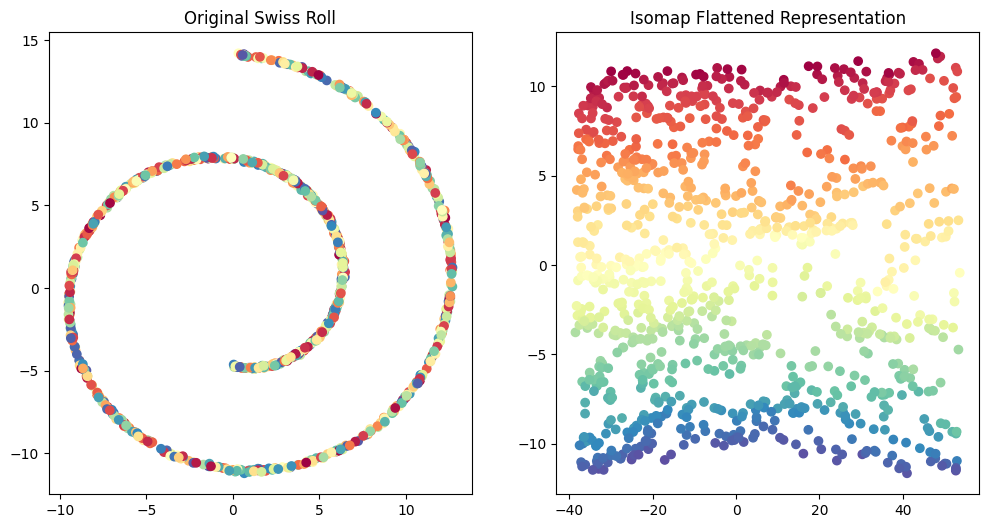

In [12]:
# Visualize the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X_swiss[:, 0], X_swiss[:, 2], c=X_swiss[:, 1], cmap='Spectral')
ax[0].set_title("Original Swiss Roll")
ax[1].scatter(X_isomap[:, 0], X_isomap[:, 1], c=X_swiss[:, 1], cmap='Spectral')
ax[1].set_title("Isomap Flattened Representation")
plt.show()

## Locally Linear Embedding (LLE)
LLE is a non-linear dimensionality reduction technique that preserves local relationships among data points.

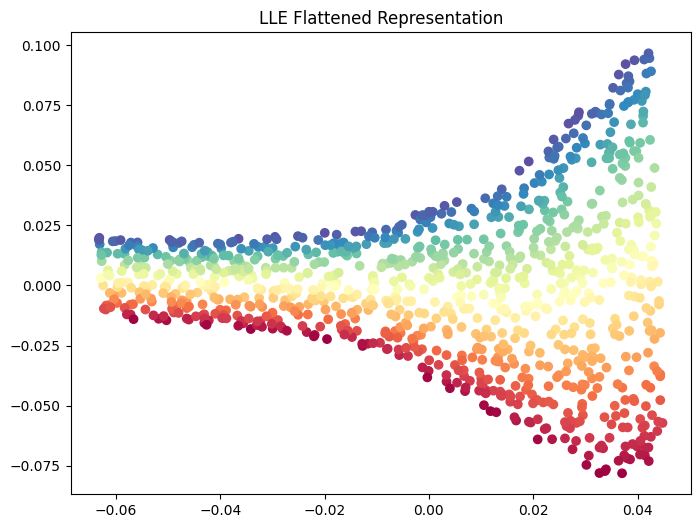

In [13]:
# Example with Swiss Roll Dataset
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X_swiss)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=X_swiss[:, 1], cmap='Spectral')
plt.title("LLE Flattened Representation")
plt.show()

In [ ]:
# Exercise 4: LLE on Custom Data
"""
Task:
1. Use LLE on a different dataset (e.g., MNIST or Iris).
2. Compare the results with other techniques (e.g., Isomap).

Hint:
Adjust `n_neighbors` to observe its effect on the output.
"""
from sklearn.datasets import fetch_openml
from sklearn.manifold import LocallyLinearEmbedding, Isomap
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Standardize the data
X = StandardScaler().fit_transform(X)

# Sample a subset of the data for faster computation
n_samples = 2000
random_state = 42
X_subset = X[:n_samples]
y_subset = y[:n_samples]

# Apply LLE and Isomap with different n_neighbors
n_neighbors_list = [5, 15, 30]
n_components = 2

for n_neighbors in n_neighbors_list:
    lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, random_state=random_state)
    X_lle = lle.fit_transform(X_subset)

    isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
    X_isomap = isomap.fit_transform(X_subset)

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    ax1.scatter(X_lle[:, 0], X_lle[:, 1], c=y_subset, cmap='tab10')
    ax1.set_title(f'LLE (n_neighbors={n_neighbors})')
    ax1.set_xlabel('First component')
    ax1.set_ylabel('Second component')

    ax2.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y_subset, cmap='tab10')
    ax2.set_title(f'Isomap (n_neighbors={n_neighbors})')
    ax2.set_xlabel('First component')
    ax2.set_ylabel('Second component')

    plt.tight_layout()
    plt.show()